In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

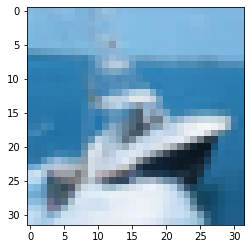

In [14]:
plt.imshow(x_train[8])

In [10]:
classes = ['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
len(classes)

10

In [17]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [18]:
x_train = x_train/255.0
x_test = x_test/255.0


In [19]:
cnn = tf.keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [21]:
cnn.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4954 - accuracy: 0.4592
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1124 - accuracy: 0.6078
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9661 - accuracy: 0.6601
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8775 - accuracy: 0.6923
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8082 - accuracy: 0.7170
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7542 - accuracy: 0.7374
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7023 - accuracy: 0.7555
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6618 - accuracy: 0.7672
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6162 - accuracy: 0.7833
Epoch 10/10
1563/1563 [==============================] - 55s 35m

In [1]:
cnn.evaluate(x_test,y_test)

NameError: ignored

In [ ]:
y_preds = cnn.predcit(x_test)

In [ ]:
test_img = 0
p = y_preds[test_img]
index = np.argmax(p)
print(classes[index])
plt.imshow(x_test[test_img])